In [1]:
import os

os.environ['https_proxy'] = 'http://127.0.0.1:15777'
os.environ['http_proxy'] = 'http://127.0.0.1:15777'

In [30]:
(label==10).squeeze() |(label==1).squeeze() 

array([False, False, False, ...,  True, False,  True])

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from ogb.nodeproppred import PygNodePropPredDataset

# 加载数据集
dataset = PygNodePropPredDataset(name='ogbn-arxiv', root='./data')
split_idx = dataset.get_idx_split()
graph = dataset[0]
data = {
    'train_idx': split_idx['train'],
    'valid_idx': split_idx['valid'],
    'test_idx': split_idx['test'],
    'graph': graph
}
label = np.array(graph.y).squeeze()

# 选择特定标签的节点
selected_labels = [28, 16, 2, 10]
mask = np.isin(label, selected_labels)
reduced_labels = label[mask]

# 加载嵌入向量
emb_names = ['emb.npy', 'pbert.npy', 'bert.npy']
for name in emb_names:
    emb = np.load(name)[mask][::50]

    tsne = TSNE(n_components=2, random_state=42)
    emb_reduced = tsne.fit_transform(emb)

    plt.figure(figsize=(6, 5))
    unique_labels = np.unique(reduced_labels)
    for ul in unique_labels:
        idx = reduced_labels == ul
        plt.scatter(emb_reduced[idx, 0], emb_reduced[idx, 1], label=f'Label {ul}', cmap='Set1', alpha=0.6)
    
    plt.title(f'2D Visualization of {name[:-4]} Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Node Labels')
    plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1229 but corresponding boolean dimension is 61435

<Figure size 600x500 with 0 Axes>

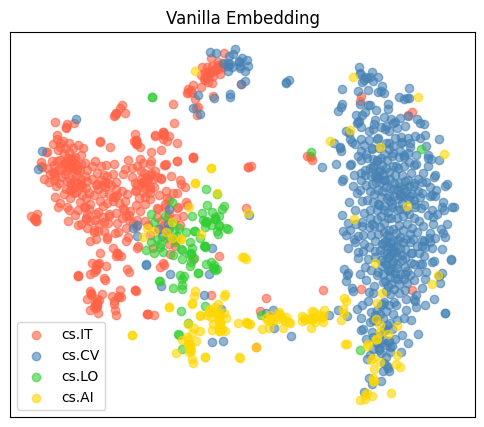

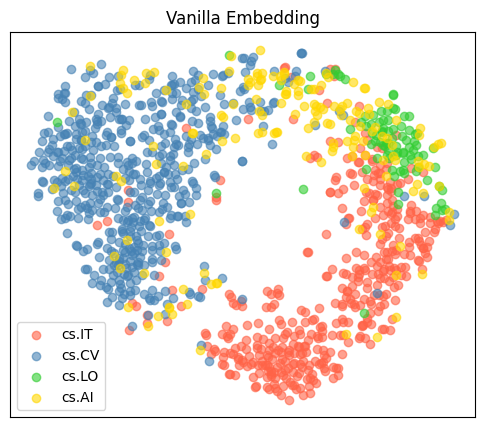

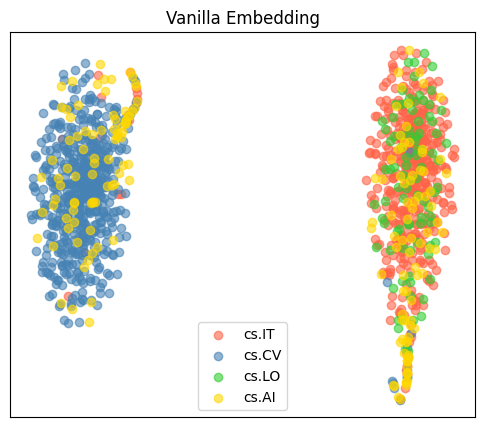

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from ogb.nodeproppred import PygNodePropPredDataset

dataset = PygNodePropPredDataset(name='ogbn-arxiv', root='./data')
split_idx = dataset.get_idx_split()
graph = dataset[0]
data = {
        'train_idx': split_idx['train'], # 90941
        'valid_idx': split_idx['valid'], # 29799
        'test_idx': split_idx['test'],   # 48603
        'graph': graph
        }
label = np.array(graph.y)
colors = {
    28: '#FF6347',  # 番茄红
    16: '#4682B4',  # 钢青色
    2: '#32CD32',   # 酸橙绿
    10: '#FFD700'   # 金色
}
ids = (label==28).squeeze() + (label==16).squeeze() + (label==2).squeeze() + (label==10).squeeze()

# 加载嵌入向量
emb_names = ['emb.npy', 'pbert.npy', 'bert.npy']
for name in emb_names:
    # emb = np.load(name)[::100]
    emb = np.load(name)[ids][::50]

    tsne = TSNE(n_components=2, random_state=42)
    emb_reduced = tsne.fit_transform(emb)

    plt.figure(figsize=(6, 5))
    # scatter = plt.scatter(emb_reduced[:, 0], emb_reduced[:, 1], c=label[::100], cmap='viridis', alpha=0.6)
    clabel = label[ids][::50]
    scatter = plt.scatter(emb_reduced[(clabel==28).squeeze(), 0], emb_reduced[(clabel==28).squeeze(), 1], color=colors[28], alpha=0.6, label='cs.IT')
    scatter = plt.scatter(emb_reduced[(clabel==16).squeeze(), 0], emb_reduced[(clabel==16).squeeze(), 1], color=colors[16], alpha=0.6, label='cs.CV')
    scatter = plt.scatter(emb_reduced[(clabel==2).squeeze(), 0], emb_reduced[(clabel==2).squeeze(), 1], color=colors[2], alpha=0.6, label='cs.LO')
    scatter = plt.scatter(emb_reduced[(clabel==10).squeeze(), 0], emb_reduced[(clabel==10).squeeze(), 1], color=colors[10], alpha=0.6, label='cs.AI')
    plt.title('Vanilla Embedding')
#     plt.xlabel('Component 1')
#     plt.ylabel('Component 2')
    # plt.grid(True)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.legend()
    plt.show()


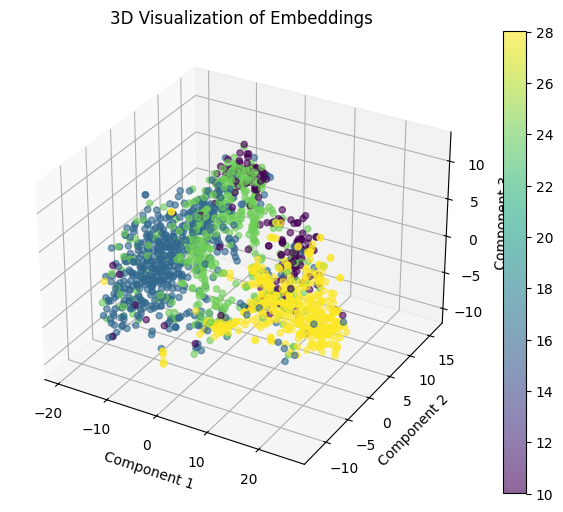

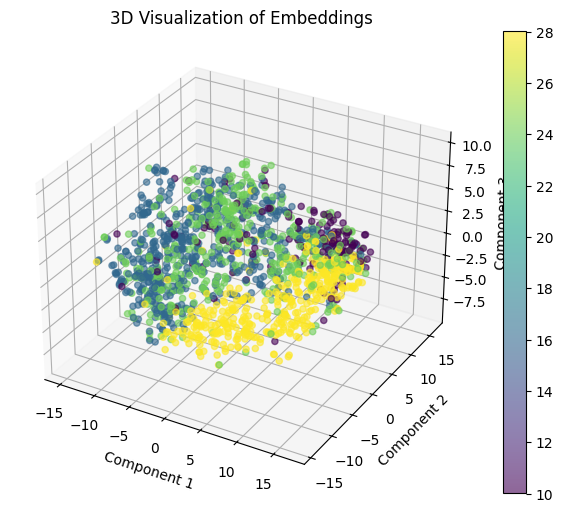

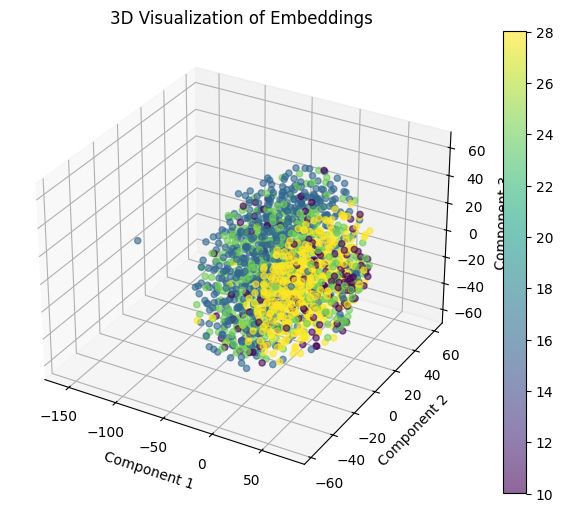

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

ids = (label==28).squeeze() + (label==16).squeeze() + (label==24).squeeze() + (label==10).squeeze()

# 加载嵌入向量
emb_names = ['emb.npy', 'pbert.npy', 'bert.npy']
for name in emb_names:
    emb = np.load(name)[ids][::50]  # 仅加载部分数据以加速处理


    # 使用t-SNE进行降维到3维
    tsne = TSNE(n_components=3, random_state=42)
    emb_reduced = tsne.fit_transform(emb)

    # 创建3D散点图
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(emb_reduced[:, 0], emb_reduced[:, 1], emb_reduced[:, 2], c=label[ids][::50], cmap='viridis', alpha=0.6)
    fig.colorbar(scatter)
    plt.title('3D Visualization of Embeddings')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.grid(True)
    plt.show()


In [2]:
from ogb.nodeproppred import PygNodePropPredDataset
import pandas as pd
from dataset.dataloader import *
from dataset.embedding import *
from torch_geometric.loader import NeighborLoader, DataLoader
import torch_geometric.transforms as T

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
dataset = PygNodePropPredDataset(name='ogbn-arxiv', root='./data')
split_idx = dataset.get_idx_split()
graph = dataset[0]
data = {
        'train_idx': split_idx['train'], # 90941
        'valid_idx': split_idx['valid'], # 29799
        'test_idx': split_idx['test'],   # 48603
        'graph': graph
        }
label = np.array(graph.y)
graph

Data(num_nodes=169343, edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])

In [12]:
a = [(np.array([ 56722,  95996,  62138,  25208, 154819,  66257,  12812, 113190,
       165892, 125000, 131652, 147469, 114756,  18399, 140895]), np.array([0.01480728, 0.01498705, 0.0153982 , 0.01540887, 0.01570058,
       0.0157249 , 0.01579928, 0.01616269, 0.01620376, 0.01631516,
       0.01634133, 0.01634324, 0.01638544, 0.01640481, 0.01655132],
      dtype=np.float32))]

print(a[0][1][:3])




[0.01480728 0.01498705 0.0153982 ]


In [7]:
dict_graph = {}
ref_count = np.zeros(graph.num_nodes)
edges = graph.edge_index
srcs, dsts = np.array(edges)
for src, dst in zip(srcs, dsts):
    if src not in dict_graph:
        dict_graph[src] = []
    dict_graph[src].append(dst)
    ref_count[dst] += 1
np.max(ref_count), np.min(ref_count), np.mean(ref_count), np.median(ref_count)

(13155.0, 0.0, 6.886868663009395, 1.0)

In [130]:
ta = load_titleabs()
for i in range(10000):
    if graph.y[i] == 10:
        print(ta[ta['node idx']==i])
        break

    node idx    paper id                                              title  \
32        32  1586330215  methods for integrating knowledge with the thr...   

                                                  abs  
32  In this paper we consider optimization as an a...  


In [20]:
node_year = graph.node_year
print(np.where(node_year == 2019)[0])
def get_test_edge_ds(year=[2020]):
    data = arxiv_dataset()
    test_ids = []
    for y in year:
        test_ids+=(np.where(data['graph'].node_year == y)[0]).tolist()
    return test_ids
get_test_edge_ds([2019, 2020])

[   346    398    451 ... 169281 169291 169297]


[346,
 398,
 451,
 480,
 488,
 490,
 526,
 537,
 602,
 616,
 682,
 683,
 685,
 688,
 690,
 691,
 692,
 693,
 694,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 804,
 811,
 814,
 829,
 830,
 832,
 861,
 870,
 872,
 877,
 879,
 882,
 888,
 897,
 898,
 906,
 937,
 962,
 976,
 977,
 978,
 984,
 995,
 1004,
 1011,
 1012,
 1018,
 1033,
 1045,
 1046,
 1071,
 1089,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1098,


In [10]:
titleabs = load_titleabs()
titleabs
title = 'a two stage 3d unet framework for multi class segmentation on full resolution image'
for i, t in enumerate(titleabs['title']):
    if title in t:
        print(i), print(t)

col, row = graph.edge_index.numpy().tolist()
for src, dst in zip(col, row):
    if src == 21718:
        print(titleabs['title'][dst])
    elif dst == 21718:
        print(titleabs['title'][src])

21718
a two stage 3d unet framework for multi class segmentation on full resolution image
deep learning for multi task medical image segmentation in multiple modalities
hierarchical 3d fully convolutional networks for multi organ segmentation
a self aware sampling scheme to efficiently train fully convolutional networks for semantic segmentation
multi views fusion cnn for left ventricular volumes estimation on cardiac mr images
deeply recursive convolutional network for image super resolution
fast r cnn
3d u net learning dense volumetric segmentation from sparse annotation
automatic 3d cardiovascular mr segmentation with densely connected volumetric convnets
u net convolutional networks for biomedical image segmentation
organ at risk segmentation in head and neck ct images by using a two stage segmentation framework based on 3d u net
cfun combining faster r cnn and u net network for efficient whole heart segmentation
a multi task u net for segmentation with lazy labels


In [28]:
import torch
import numpy as np
a = torch.tensor([1,2,3,4,5,6,7,8,9,10, 1, 1])
d = {}
for i, x in enumerate(a):
    d[x] = i
d

{tensor(1): 0,
 tensor(2): 1,
 tensor(3): 2,
 tensor(4): 3,
 tensor(5): 4,
 tensor(6): 5,
 tensor(7): 6,
 tensor(8): 7,
 tensor(9): 8,
 tensor(10): 9,
 tensor(1): 10,
 tensor(1): 11}

In [ ]:
pt = torch.load()

In [5]:
def naive_search(a, b=None):
    for i in range(graph.edge_index.shape[1]):
        if b is not None:
            if graph.edge_index[0][i] == a and graph.edge_index[1][i] == b:
                print(i)
                return
        else:
            if graph.edge_index[0][i] == a:
                print(i, graph.edge_index[1][i])
        
naive_search(13091)


7499 tensor(42537)
7500 tensor(124512)


In [39]:
batch.edge_index

EdgeIndex([[1024, 1025, 1026,  ..., 3291, 3292, 3293],
           [   1,    1,    2,  ..., 2459, 2461, 2462]],
          sparse_size=(3294, 3294), nnz=2374, sort_order=col)

In [40]:
import random
from typing import List, Tuple


class BiasedRandomWalker:

    def __init__(self, db, p: float = 1.2, q: float = 2.0):
        self.db = db
        self.ret_p = p
        self.io_q = q

        self.connected_nodes = self._get_connected_nodes()

    def _get_connected_nodes(self):

        txn = self.db.CreateReadTxn()
        vit = txn.GetVertexIterator()

        connected_nodes = []
        while vit.IsValid():
            if vit.GetNumOutEdges()[0] > 0:
                connected_nodes.append(vit.GetId())
            vit.Next()

        txn.Commit()
        return connected_nodes

    def _normalize(self, weights):
        tot = sum(weights)
        return [p / tot for p in weights]

    def get_probs_uniform(self, txn, vit) -> Tuple[List[int], List[float]]:
        nexts = vit.ListDstVids()[0]
        probs = [1 / len(nexts)] * len(nexts)
        return nexts, probs

    def get_probs_biased(self, txn, vit, prev: int) -> Tuple[List[int], List[float]]:
        curr_nbrs = vit.ListDstVids()[0]

        nexts = []
        unnormalized_probs = []
        for next in curr_nbrs:
            nexts.append(next)
            if next == prev:
                unnormalized_probs.append(1 / self.ret_p)
            elif txn.GetVertexIterator(next).HasEdge(prev):
                unnormalized_probs.append(1)
            else:
                unnormalized_probs.append(1 / self.io_q)

        probs = self._normalize(unnormalized_probs)
        return nexts, probs

    def walk(self, start: int, length: int) -> List[int]:

        txn = self.db.CreateReadTxn()
        vit = txn.GetVertexIterator(start)

        trace = [vit.GetId()]
        current_len = 1
        
        prev = None
        
        while current_len < length:
            if prev is None:
                nexts, probs = self.get_probs_uniform(txn, vit)
            else:
                nexts, probs = self.get_probs_biased(txn, vit, prev)

            target = random.choices(nexts, probs)[0]
            trace.append(target)

            vit.Goto(vid=target, nearest=False)
            current_len += 1

        txn.Commit()
        return trace


ImportError: cannot import name 'random_walk' from 'torch_geometric.utils' (/home/loping151/anaconda3/envs/dm/lib/python3.10/site-packages/torch_geometric/utils/__init__.py)